<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

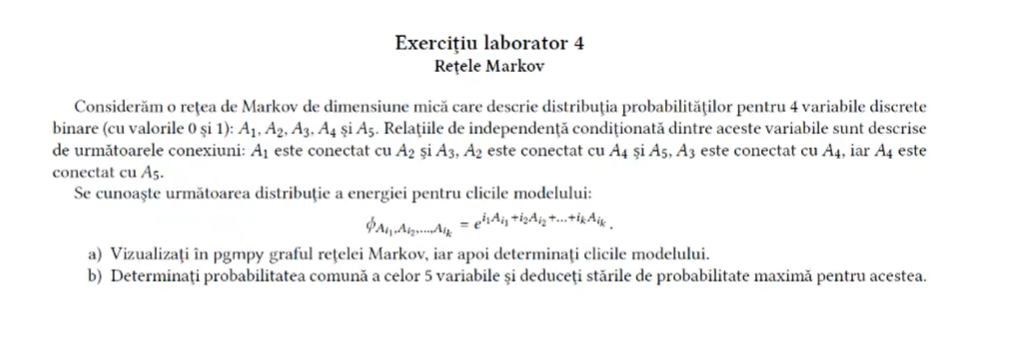

In [ ]:
!pip install pgmpy

{'A1': 1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': 1}


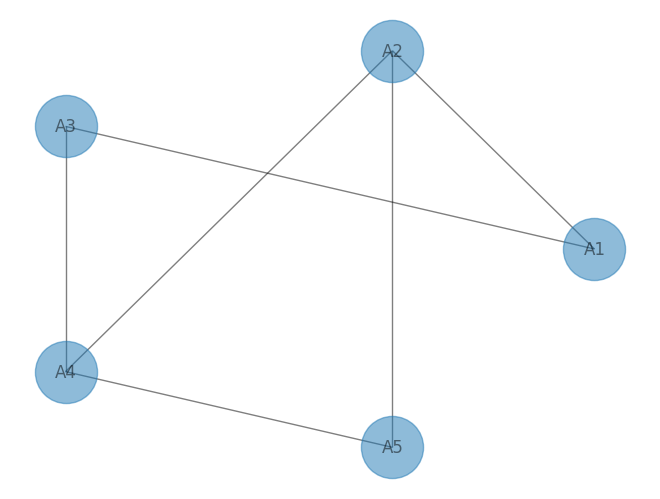

In [10]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np
import networkx as nx

model = MarkovNetwork()
model.add_nodes_from(['A1', 'A2', 'A3', 'A4', 'A5'])
model.add_edges_from([('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')])

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)


#clici: (1 2) (1 3) (2 4 5) (3 4)

pairwise_potential = np.array([[np.exp(1*v1 + 2*v2)  for v2 in range(2)] for v1 in range(2)])
factor = DiscreteFactor(variables=['A1', 'A2'], cardinality=[2, 2], values = pairwise_potential.flatten())
model.add_factors(factor)

pairwise_potential = np.array([[np.exp(1*v1 + 3*v2)  for v2 in range(2)] for v1 in range(2)])
factor = DiscreteFactor(variables=['A1', 'A3'], cardinality=[2, 2], values = pairwise_potential.flatten())
model.add_factors(factor)

pairwise_potential = np.array([[np.exp(3*v1 + 4*v2)  for v2 in range(2)] for v1 in range(2)])
factor = DiscreteFactor(variables=['A3', 'A4'], cardinality=[2, 2], values = pairwise_potential.flatten())
model.add_factors(factor)

pairwise_potential = np.array([[[np.exp(2*v1 + 4*v2 + 5*v3)  for v2 in range(2)] for v1 in range(2)] for v3 in range(2)])
factor = DiscreteFactor(variables=['A2', 'A4', 'A5'], cardinality=[2, 2, 2], values = pairwise_potential.flatten())
model.add_factors(factor)

bp_infer = BeliefPropagation(model)
marginals = bp_infer.map_query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])

print(marginals)